# 6.2 Exploring relationships

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.4'

In [3]:
path = r'C:\Users\paulo\OneDrive\USA Education\Career Foundry\Data Analysis\Modulo 07 - Dashboard\Flavors of Cacao Project'

In [4]:
df_cacao = pd.read_csv(os.path.join(path, '02 - Data', 'Prepare data', 'flavors_of_cacao_data_wrangled.csv'), index_col = False)

## 2. Data Cleaning

In [10]:
df_cacao.shape

(1795, 9)

In [11]:
df_cacao.dtypes

company_name             object
origin_bean_bar_name     object
REF                       int64
review_year               int64
cocoa_percent            object
company_location         object
rating                  float64
bean_type                object
bean_country_origin      object
dtype: object

In [12]:
df_cacao.isnull().sum()

company_name            0
origin_bean_bar_name    0
REF                     0
review_year             0
cocoa_percent           0
company_location        0
rating                  0
bean_type               0
bean_country_origin     0
dtype: int64

No missing values

In [14]:
df_cacao_dups = df_cacao[df_cacao.duplicated()]

In [15]:
df_cacao_dups.shape

(0, 9)

No duplicates

In [16]:
for col in df_cacao.columns.tolist():
      weird = (df_cacao[[col]].applymap(type) != df_cacao[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_cacao[weird]) > 0:
        print (col)

C:\Users\paulo\AppData\Local\Temp\ipykernel_1204\1888520240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_cacao[[col]].applymap(type) != df_cacao[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\paulo\AppData\Local\Temp\ipykernel_1204\1888520240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_cacao[[col]].applymap(type) != df_cacao[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\paulo\AppData\Local\Temp\ipykernel_1204\1888520240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_cacao[[col]].applymap(type) != df_cacao[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\paulo\AppData\Local\Temp\ipykernel_1204\1888520240.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_cacao[[col]].applymap(type) != df_cacao[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\paulo\AppData\L

In [18]:
df_cacao.dtypes

company_name             object
origin_bean_bar_name     object
REF                       int64
review_year               int64
cocoa_percent            object
company_location         object
rating                  float64
bean_type                object
bean_country_origin      object
dtype: object

## 2. Correlations

In [19]:
df_cacao_numeric = df_cacao.select_dtypes(include=['int', 'float'])

In [21]:
# Create a correlation matrix using pandas

df_cacao_numeric.corr()

,REF,review_year,rating
REF,1.000000,0.985076,0.101030
review_year,0.985076,1.000000,0.099846
rating,0.101030,0.099846,1.000000


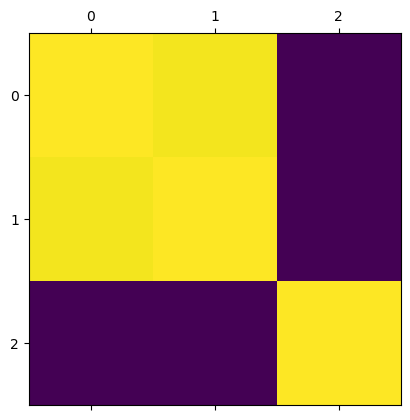

In [22]:
# Create correlation heatmap usisng marploit

plt.matshow(df_cacao_numeric.corr())
plt.show()

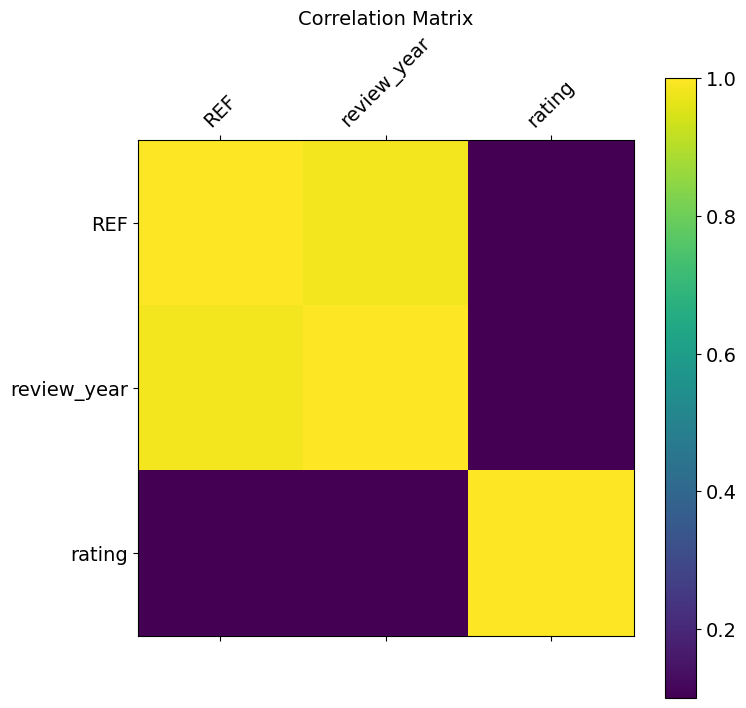

In [28]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_cacao_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_cacao_numeric.shape[1]), df_cacao_numeric.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_cacao_numeric.shape[1]), df_cacao_numeric.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Save image

plt.savefig(os.path.join(path,'Heatmap_corr.png'))

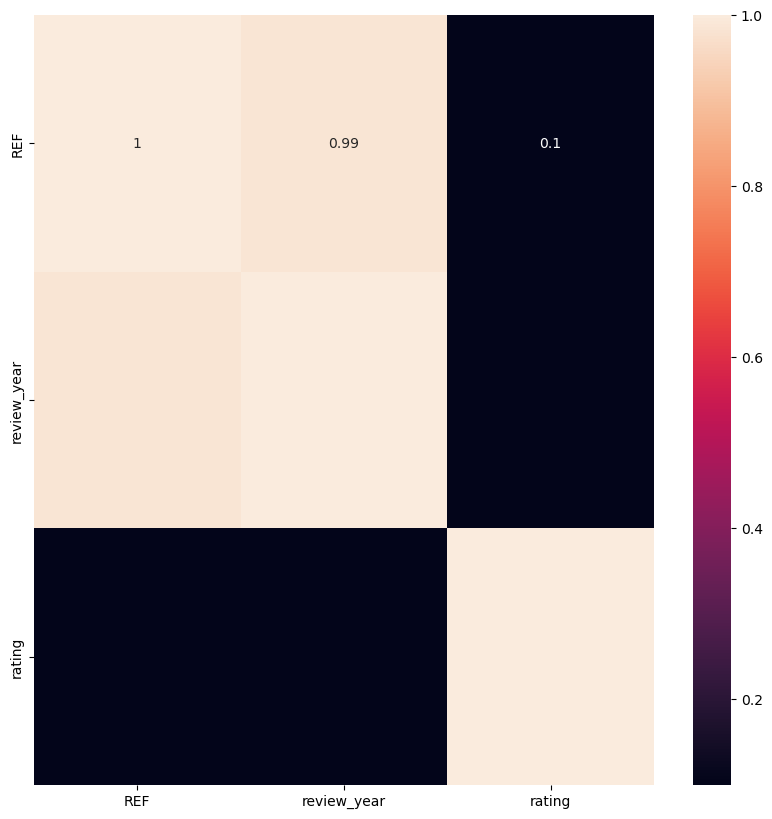

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_cacao_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Save image

plt.savefig(os.path.join(path, "Seaborn_heatmap_plot.png"))

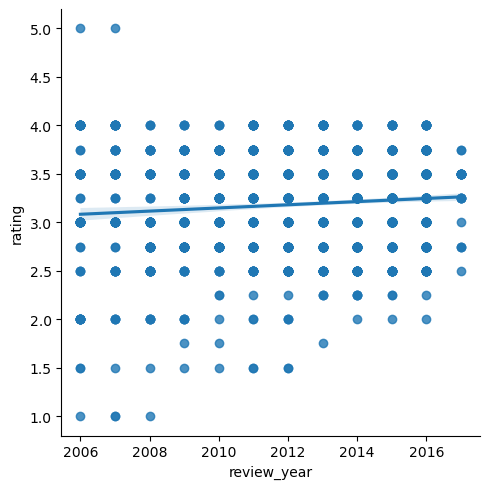

In [37]:
#Create a scatterplot for the "rating" and "review year" columns in seaborn

sns.lmplot(x = 'review_year', y = 'rating', data = df_cacao_numeric)

# Save image

plt.savefig(os.path.join(path,'Scatterplot_review_year_rating.png'))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


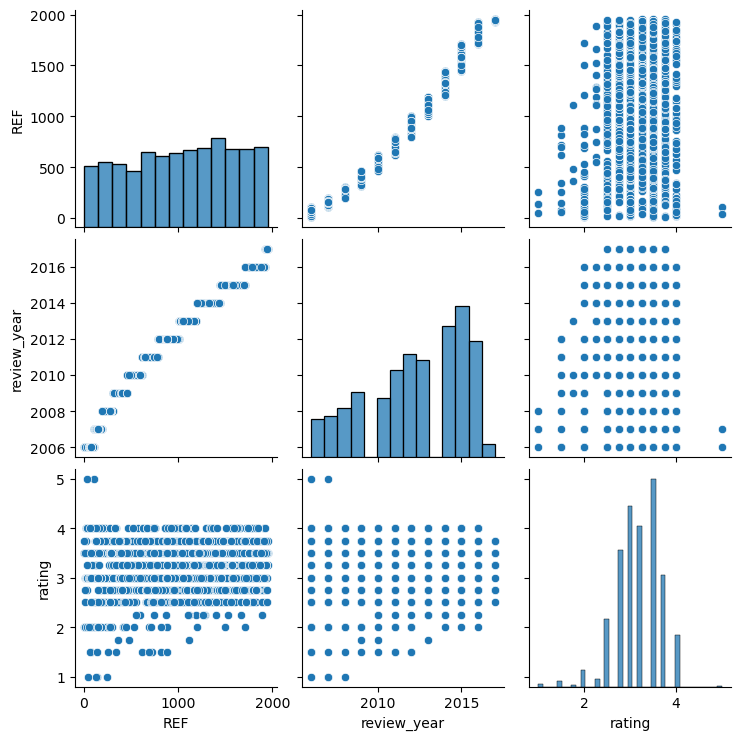

In [39]:
# Create a pair plot

g = sns.pairplot(df_cacao_numeric)

# Save image

plt.savefig(os.path.join(path,'Pair_plot_review_year_rating_ref.png'))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


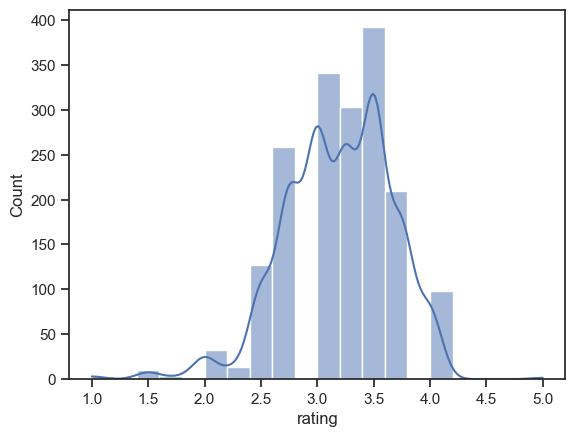

In [48]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_cacao_numeric['rating'], bins = 20, kde = True)

# Save image


plt.savefig(os.path.join(path,'Histogram_rating.png'))

In [42]:
df_cacao.loc[df_cacao['rating'] < 2.0, 'rating_category'] = 'Low rating'

In [43]:
df_cacao.loc[(df_cacao['rating'] >= 2.0) & (df_cacao['rating'] < 3.5), 'rating_category'] = 'Medium rating'

In [44]:
df_cacao.loc[df_cacao['rating'] >= 3.5, 'rating_category'] = 'High rating'

In [45]:
df_cacao['rating_category'].value_counts(dropna = False)

rating_category
Medium rating    1076
High rating       702
Low rating         17
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


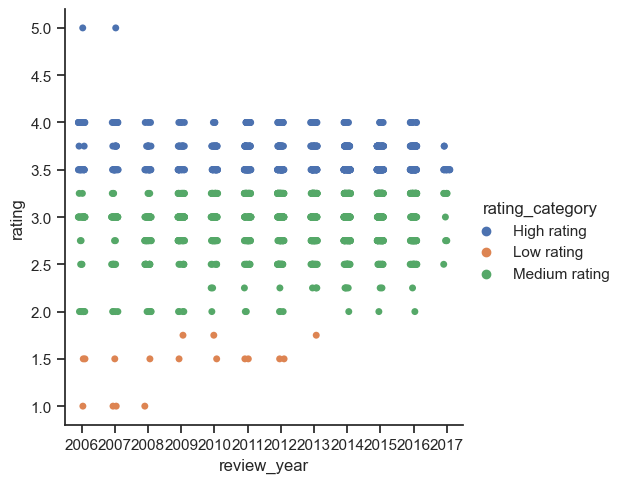

In [47]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
g = sns.catplot(x="review_year", y="rating", hue="rating_category", data=df_cacao)

# Save image

plt.savefig(os.path.join(path,'Rating_category_review_year.png'))

## 3. Questions

What are the top 10 rated companies cocoa?

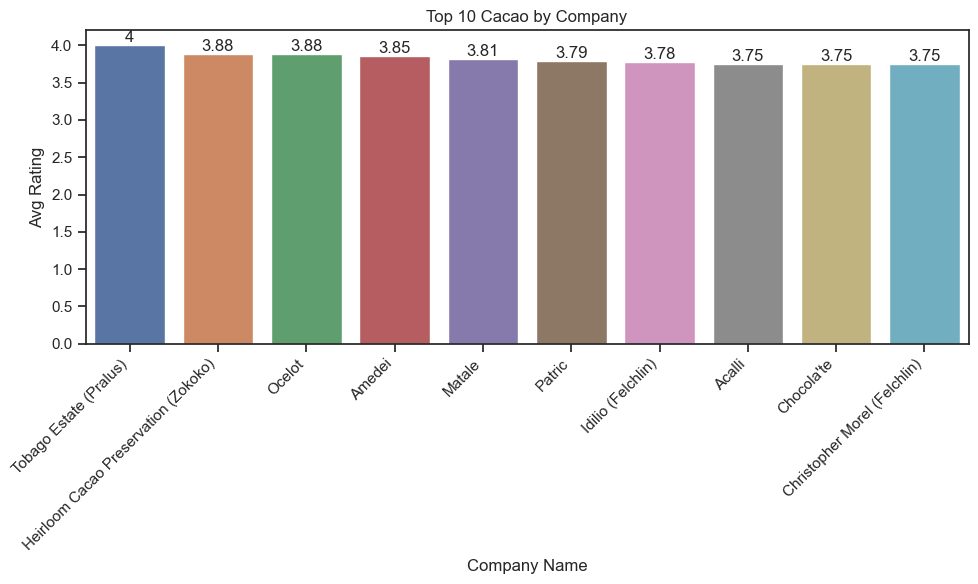

In [72]:
#Get the overall top 10 cocoa
top_cacao = df_cacao.groupby("company_name")['rating'].mean().nlargest(10)

# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_cacao.index, y=np.around(top_cacao.values, 2))
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Company Name')
plt.ylabel('Avg Rating')
plt.title('Top 10 Cacao by Company')
ab.bar_label(ab.containers[0])
plt.tight_layout()

# Save image

plt.savefig(os.path.join(path,'Top_10_rated_companies.png'))

The top 5 countries that produce Cocoa Beans

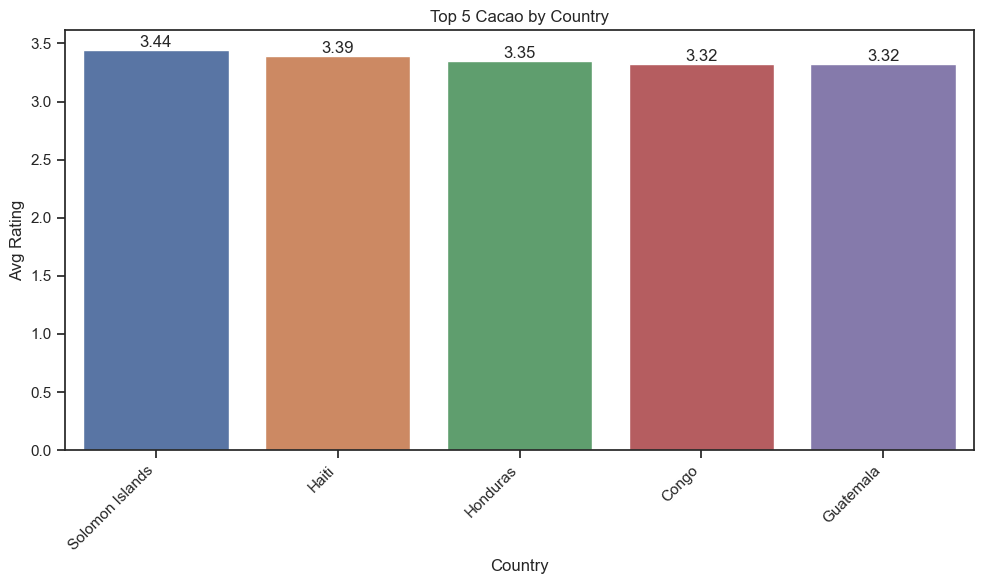

In [71]:
#Get the top 5 countries
top_cacao_country = df_cacao.groupby("bean_country_origin")['rating'].mean().nlargest(5)


# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_cacao_country.index, y=np.around(top_cacao_country.values, 2))
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Avg Rating')
plt.title('Top 5 Cacao by Country')
ab.bar_label(ab.containers[0])
plt.tight_layout()

# Save image

plt.savefig(os.path.join(path,'Top_5_rated_countries.png'))

 What is the percentage of cocoa with the best and worst average rating?

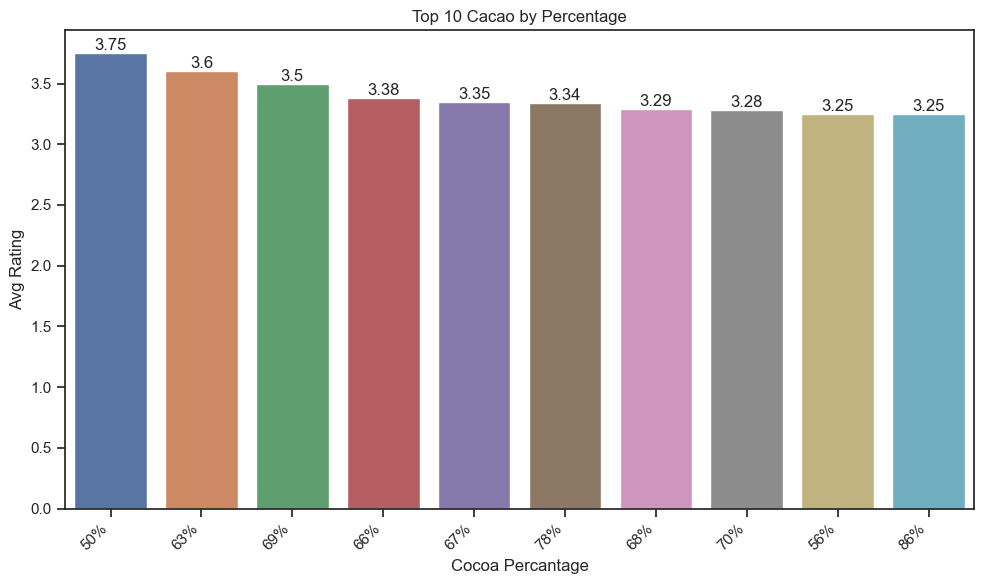

In [74]:
#Get the top 10 rating by percentage
top_cacao_percentage = df_cacao.groupby("cocoa_percent")['rating'].mean().nlargest(10)


# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_cacao_percentage.index, y=np.around(top_cacao_percentage.values, 2))
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Cocoa Percantage')
plt.ylabel('Avg Rating')
plt.title('Top 10 Cacao by Percentage')
ab.bar_label(ab.containers[0])
plt.tight_layout()

# Save image

plt.savefig(os.path.join(path,'Top_10_cocoa_percentage.png'))

 What year had the best average rating?


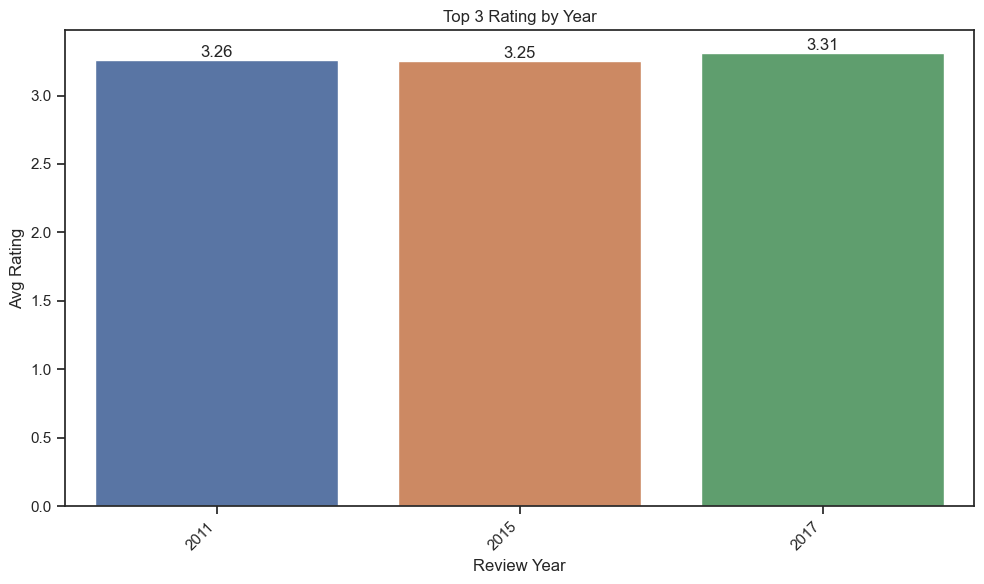

In [76]:
#Get the year with best average rating
top_3_avg_rating_year = df_cacao.groupby("review_year")['rating'].mean().nlargest(3)


# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_3_avg_rating_year.index, y=np.around(top_3_avg_rating_year.values, 2))
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Review Year')
plt.ylabel('Avg Rating')
plt.title('Top 3 Rating by Year')
ab.bar_label(ab.containers[0])
plt.tight_layout()

# Save image

plt.savefig(os.path.join(path,'Top_3_raying_year.png'))

 What is the relationship between cocoa bean types and rating?

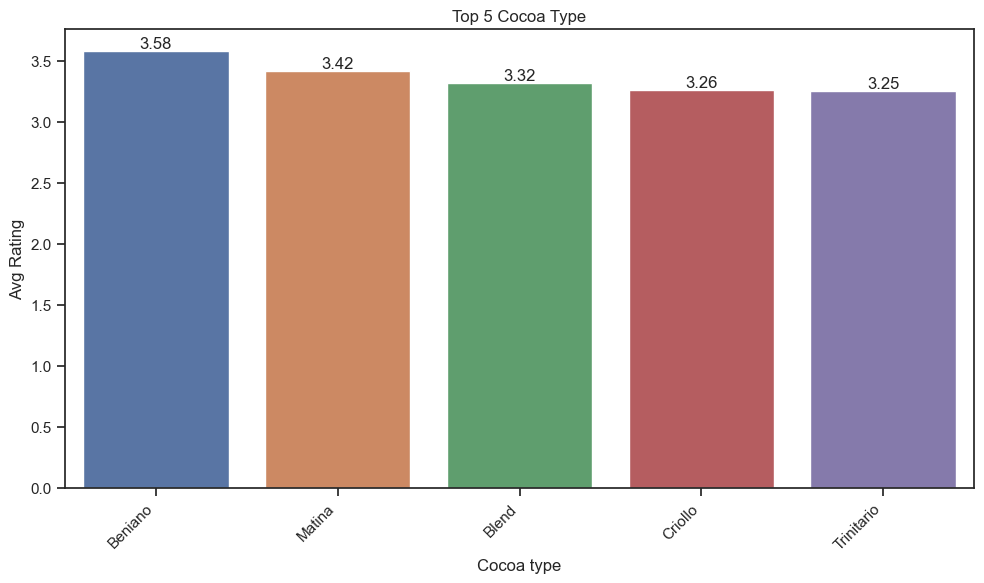

In [77]:
#Get the cocoa type with average rating
top_5_cocoa_types = df_cacao.groupby("bean_type")['rating'].mean().nlargest(5)


# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_5_cocoa_types.index, y=np.around(top_5_cocoa_types.values, 2))
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Cocoa type')
plt.ylabel('Avg Rating')
plt.title('Top 5 Cocoa Type')
ab.bar_label(ab.containers[0])
plt.tight_layout()

# Save image

plt.savefig(os.path.join(path,'Top_5_Cocoa_type.png'))

## 4. Export

In [78]:
df_cacao.to_csv(os.path.join(path, '02 - Data', 'Prepare data', 'flavors_of_cacao_rating_category.csv'), index = False)